In [1]:
!pip install --upgrade gupload

from pydrive.auth import GoogleAuth
from google.colab import auth

     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 81 kB 7.7 MB/s 
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.290 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.7.10 which is incompatible.


In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/AIMLProject3/yolov3

/content/drive/MyDrive/AIMLProject3/yolov3


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15386, done.
remote: Total 15386 (delta 0), reused 0 (delta 0), pack-reused 15386
Receiving objects: 100% (15386/15386), 14.01 MiB | 5.57 MiB/s, done.
Resolving deltas: 100% (10345/10345), done.
Checking out files: 100% (2050/2050), done.


In [5]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/drive/MyDrive/AIMLProject3/yolov3/darknet


In [6]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [7]:
# build darknet 
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [8]:
!pwd

/content/drive/My Drive/AIMLProject3/yolov3/darknet


In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

/content/drive/My Drive/AIMLProject3/yolov3/darknet/data
/content/drive/My Drive/AIMLProject3/yolov3/darknet


In [ ]:
# Copy the yolov4-custom.cfg file so that it is now in /darknet/cfg/ folder 

!cp /content/drive/MyDrive/AIMLProject3/yolov3/yolov3-tiny-bdd100k.cfg  cfg

# verify if your custom file is in cfg folder
!ls cfg/

yolov3-tiny-bdd100k.cfg


In [ ]:
# Copy the bdd100k.names and bdd100k.data files from your drive so that they are now in /darknet/data/ folder 

!cp /content/drive/MyDrive/AIMLProject3/yolov3/bdd100k.names data
!cp /content/drive/MyDrive/AIMLProject3/yolov3/bdd100k.data data

# verify if the above files are in data folder
!ls data/

bdd100k.data  bdd100k.names  labels


In [ ]:
!pwd

/content/drive/My Drive/AIMLProject3/yolov3/darknet


In [ ]:
!ln -s /content/drive/MyDrive/AIMLProject3/bdd100k/images/100k/train /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data

In [ ]:
!ln -s /content/drive/MyDrive/AIMLProject3/bdd100k/images/100k/val /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data

In [ ]:
!ln -s /content/drive/MyDrive/AIMLProject3/bdd100k/images/100k/test /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data

In [ ]:
!cp /content/drive/MyDrive/AIMLProject3/yolov3/darknet53.conv.74 /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg

In [ ]:
!cp /content/drive/MyDrive/AIMLProject3/train.txt /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data
!cp /content/drive/MyDrive/AIMLProject3/val.txt /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/darknet53.conv.74 -dont_show -map

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max          

#### 2nd time run after removing the unloaded images

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/darknet53.conv.74 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.313704), count: 41, class_loss = 14.124459, iou_loss = 12.364032, total_loss = 26.488491 
 total_bbox = 920566, rewritten_bbox = 15.567923 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.536980), count: 6, class_loss = 2.647170, iou_loss = 1.516829, total_loss = 4.163999 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.394921), count: 48, class_loss = 12.834791, iou_loss = 10.601995, total_loss = 23.436787 
 total_bbox = 920620, rewritten_bbox = 15.567661 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.501727), count: 9, class_loss = 3.065157, iou_loss = 2.484159, total_loss = 5.549316 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.345793), count: 74, class_loss = 18.197058, iou_loss = 18.147306, total_loss = 36.3

In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)
#!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_last.weights -dont_show -map

!./darknet detector train /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data  /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg  /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.329444), count: 63, class_loss = 14.624353, iou_loss = 25.821070, total_loss = 40.445423 
 total_bbox = 190811, rewritten_bbox = 14.051600 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.620845), count: 13, class_loss = 5.051010, iou_loss = 2.210026, total_loss = 7.261035 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.396426), count: 31, class_loss = 9.854677, iou_loss = 6.874512, total_loss = 16.729189 
 total_bbox = 190855, rewritten_bbox = 14.048362 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.612132), count: 6, class_loss = 2.732472, iou_loss = 0.972424, total_loss = 3.704896 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.308630), count: 74, class_loss = 16.727957, iou_loss = 18.739370, total_loss = 35.46

### Another Train run using Colab Pro

In [ ]:
# This is another run from Colab Pro

!./darknet detector train /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data  /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg  /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.352945), count: 65, class_loss = 9.131879, iou_loss = 15.132630, total_loss = 24.264509 
 total_bbox = 15495886, rewritten_bbox = 15.412690 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.707491), count: 8, class_loss = 2.440816, iou_loss = 0.715244, total_loss = 3.156060 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.419712), count: 63, class_loss = 8.965067, iou_loss = 10.280109, total_loss = 19.245176 
 total_bbox = 15495957, rewritten_bbox = 15.412704 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.726017), count: 8, class_loss = 0.988535, iou_loss = 0.638164, total_loss = 1.626699 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.365732), count: 64, class_loss = 12.034845, iou_loss = 12.721325, total_loss = 24

### With the generated weights after training , testing using BDD100K TEST images

### Testing

In [ ]:
!./darknet detector test /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26

#### Starting the TRAINING again for displaying the CHART to understand the performance 

In [10]:
# change line batch to batch=64
# change line subdivisions to subdivisions=16
# You can do it either manually or by simply running the code below

#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=1/batch=64/' yolov3-tiny-bdd100k.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' yolov3-tiny-bdd100k.cfg
%cd ..

/content/drive/My Drive/AIMLProject3/yolov3/darknet/cfg
/content/drive/My Drive/AIMLProject3/yolov3/darknet


In [11]:
## training from scratch 
!./darknet detector train /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/darknet53.conv.74 -dont_show -map


Streaming output truncated to the last 5000 lines.
 total_bbox = 57224885, rewritten_bbox = 15.364079 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.726726), count: 13, class_loss = 1.913158, iou_loss = 0.870932, total_loss = 2.784090 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.486418), count: 47, class_loss = 6.470804, iou_loss = 5.652186, total_loss = 12.122990 
 total_bbox = 57224945, rewritten_bbox = 15.364069 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.754904), count: 14, class_loss = 2.433217, iou_loss = 1.100769, total_loss = 3.533986 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.477510), count: 61, class_loss = 11.429426, iou_loss = 8.107864, total_loss = 19.537291 
 total_bbox = 57225020, rewritten_bbox = 15.364058 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.656189), count: 13, class_

In [12]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(10, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

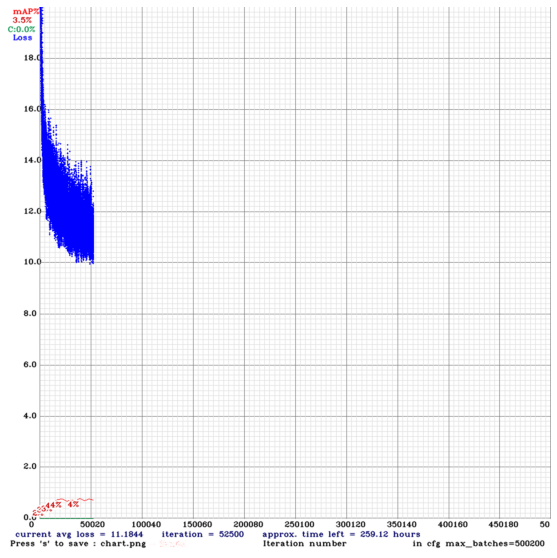

In [13]:
#only works if the training does not get interrupted
imShow('chart.png')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26

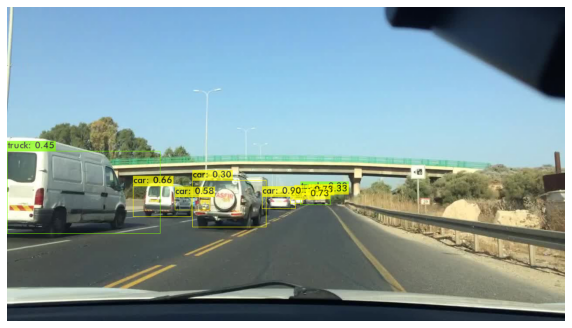

In [ ]:
!./darknet detector test /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg  /mydrive/yolov4/training/yolov4-custom_best.weights /content/cabc30fc-eb673c5a.jpg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26

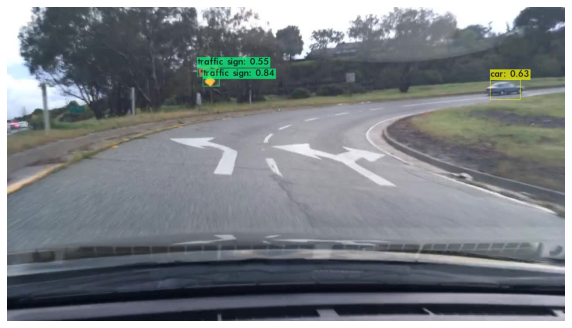

In [ ]:
!./darknet detector test /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights
imShow('predictions.jpg')

#### Starting training again from best weights

In [ ]:
# This is another run from best weights
# This run is without parameters If error occurs - run training with flag: -dont_show 
!./darknet detector train /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights 


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov3-tiny-bdd100k
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52

In [ ]:
# This is another run from best weights

!./darknet detector train /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights -dont_show -map


Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.680452), count: 9, class_loss = 1.816966, iou_loss = 1.226295, total_loss = 3.043261 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.380743), count: 72, class_loss = 12.243795, iou_loss = 9.388508, total_loss = 21.632303 
 total_bbox = 6612620, rewritten_bbox = 15.024408 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.711263), count: 8, class_loss = 1.527592, iou_loss = 1.009274, total_loss = 2.536867 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.473056), count: 63, class_loss = 8.817469, iou_loss = 12.188162, total_loss = 21.005630 
 total_bbox = 6612691, rewritten_bbox = 15.024368 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.654890), count: 11, class_loss = 1.781453, iou_loss = 1.044751, total_loss = 2.8262

##### Calculating mAP for BDD100K dataset

In [ ]:
!./darknet detector map /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_20000.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26

### Testing for best map

In [ ]:
!./darknet detector map /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 

### Checking map with last weights

In [ ]:
!./darknet detector map /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_last.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 

### Testing our custom object detector

In [ ]:
!pwd

/content/drive/My Drive/AIMLProject3/yolov3/darknet


In [ ]:
# change line batch to batch=1
# change line subdivisions to subdivisions=1
# You can do it either manually or by simply running the code below

#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-tiny-bdd100k.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-tiny-bdd100k.cfg
%cd ..

/content/drive/My Drive/AIMLProject3/yolov3/darknet/cfg
/content/drive/My Drive/AIMLProject3/yolov3/darknet


##Run detector on an image

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 

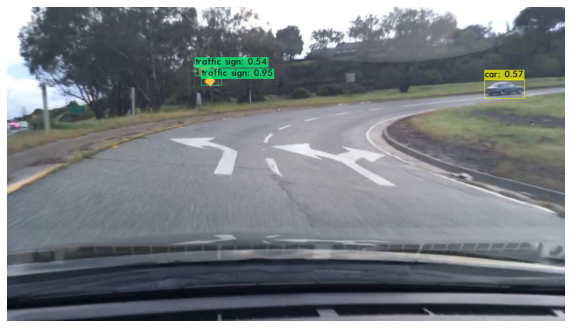

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights /content/drive/MyDrive/AIMLProject3/bdd100k/images/100k/test/caee33ed-136d6b7c.jpg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 

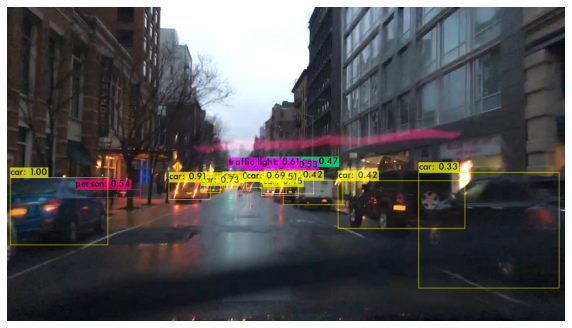

In [ ]:
!./darknet detector test /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights /content/drive/MyDrive/AIMLProject3/bdd100k/images/100k/test/cad180c4-2edc9315.jpg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 

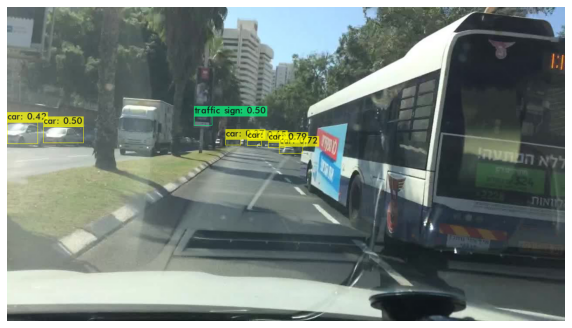

In [ ]:
!./darknet detector test /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights /content/drive/MyDrive/AIMLProject3/bdd100k/images/100k/test/cabf9f3c-d58a6760.jpg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 

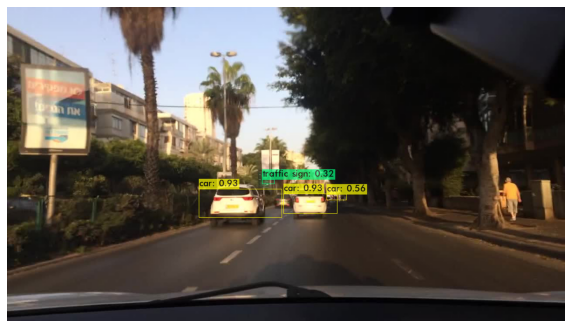

In [ ]:
!./darknet detector test /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights /content/drive/MyDrive/AIMLProject3/bdd100k/images/100k/test/cabc30fc-e7726578.jpg -thresh 0.3 
imShow('predictions.jpg')

### Detecting the objects in the video

In [ ]:
!./darknet detector demo /content/drive/MyDrive/AIMLProject3/yolov3/darknet/data/bdd100k.data  /content/drive/MyDrive/AIMLProject3/yolov3/darknet/cfg/yolov3-tiny-bdd100k.cfg /content/drive/MyDrive/AIMLProject3/yolov3/training/yolov3-tiny-bdd100k_best.weights -dont_show /content/drive/MyDrive/AIMLProject3/usa-street.mp4 -i 0 -out_filename /content/drive/MyDrive/AIMLProject3/video_finalresult.avi 

Streaming output truncated to the last 5000 lines.
car: 94% 
car: 91% 
car: 83% 
car: 78% 
car: 62% 
car: 32% 

FPS:58.2 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

truck: 34% 
person: 64% 
car: 94% 
car: 91% 
car: 81% 
car: 79% 
car: 63% 
car: 41% 
car: 33% 

FPS:58.2 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

truck: 31% 
person: 76% 
car: 94% 
car: 89% 
car: 82% 
car: 80% 
car: 76% 
car: 33% 
car: 32% 

FPS:55.9 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

truck: 28% 
person: 59% 
person: 40% 
car: 95% 
car: 87% 
car: 87% 
car: 85% 
car: 76% 
car: 46% 
car: 33% 

FPS:54.9 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

truck: 32% 
person: 49% 
person: 33% 
car: 91% 
car: 90% 
car: 85% 
car: 82% 
car: 67% 
car: 46% 
car: 37% 

FPS:54.6 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

car: 35% , truck: 33% 
person: 50% 
person: 47% 
car: 94% 
car: 91% 
car: 87% 
car: 81% 
car: 59% 
car: 41% 

FPS:53.2 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

car: 44% , truck: 30% 
person: 55% 
person: 50% 
car: 94% 
car: 93% 

### Trying to get the cars

In [ ]:
!pip install cvlib

     |████████████████████████████████| 10.0 MB 4.0 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044619 sha256=72e71b641b234a4619c1ec87079103ab0caca116af6f74df6f577826b0d4231a
  Stored in directory: /root/.cache/pip/wheels/9b/96/9b/373c07517ffe0bedbebc0813aec1e62cb2bb1dee91b3694895
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=fd615671e5eaaf8e27f47a6fe129ada3c1d73cfca94a02e89e633d88aa4117f2
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [ ]:
!pip install opencv-contrib-python==3.4.13.47 --force-reinstall

     |████████████████████████████████| 53.7 MB 190 kB/s 
     |████████████████████████████████| 15.7 MB 41.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

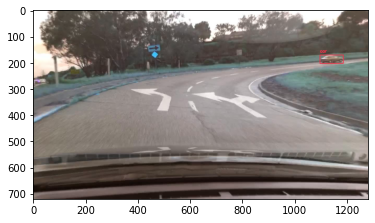

Number of cars in the image is 1


In [ ]:
#/content/drive/MyDrive/AIMLProject3/bdd100k/images/100k/test/caee33ed-136d6b7c.jpg
im = cv2.imread('/content/drive/MyDrive/AIMLProject3/bdd100k/images/100k/test/caee33ed-136d6b7c.jpg')
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.imshow(output_image)
plt.show()
print('Number of cars in the image is '+ str(label.count('car')))

In [ ]:
!pip install gradio

     |████████████████████████████████| 900 kB 4.3 MB/s 
     |████████████████████████████████| 210 kB 69.6 MB/s 
     |████████████████████████████████| 2.0 MB 49.2 MB/s 
     |████████████████████████████████| 3.6 MB 54.3 MB/s 
     |████████████████████████████████| 61 kB 625 kB/s 
     |████████████████████████████████| 961 kB 62.5 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=7d2d8d0c0e06c0b1d2af0d2dc813b689c8ba6ee84a0df5eee2f15b2e45ac683f
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=9a62b88391748ebc1d403b4cf9b7e248e6a20a5b8e22ea44a71cff1a2d1406e4
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
import gradio as gr
import numpy as np

def test(img):
  bbox, label, conf = cv.detect_common_objects(img)
  output_image = draw_bbox(img, bbox, label, conf)                         
  return output_image

iface = gr.Interface(test, gr.inputs.Image(shape=(300, 300)), "image")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://40015.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://40015.gradio.app')